# Reference: Gridded Model Data

Minimal example of requesting and plotting gridded model data from EDEX using python-awips.

In [1]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Connect to EDEX and create request
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest("grid")

# Configure request: model, parameter, level
request.setLocationNames("RAP13")
request.setParameters("T")
request.setLevels("2.0FHAG")

In [3]:
# Get available times and select most recent
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
fcst_run = DataAccessLayer.getForecastRun(cycles[-1], times)

# Fetch the data
response = DataAccessLayer.getGridData(request, [fcst_run[0]])
grid = response[0]

# Extract arrays
data = grid.getRawData()
lons, lats = grid.getLatLonCoords()

print(f"Model: {grid.getLocationName()}, Parameter: {grid.getParameter()}, Unit: {grid.getUnit()}")
print(f"Valid: {grid.getDataTime()}")

Model: RAP13, Parameter: T, Unit: K
Valid: 2026-01-25 09:00:00 (2)


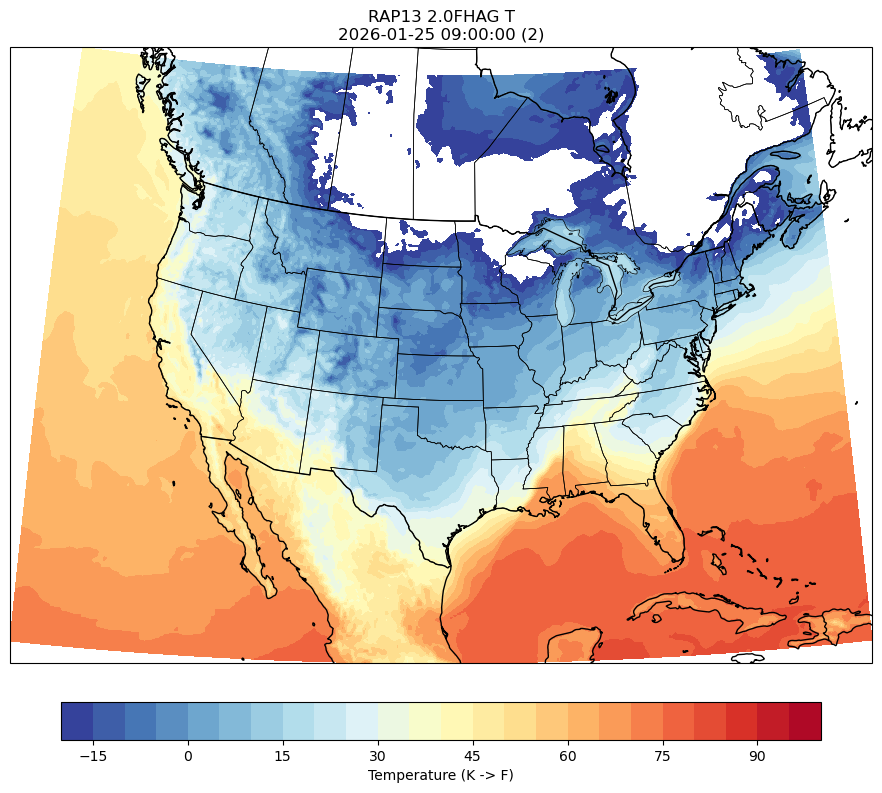

In [4]:
# Convert K to F
data_f = (data - 273.15) * 9/5 + 32

# Plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linewidth=0.5)

cf = ax.contourf(lons, lats, data_f, levels=np.arange(-20, 105, 5),
                 cmap='RdYlBu_r', transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
cb.set_label(f'Temperature ({grid.getUnit()} -> F)')

ax.set_title(f"{grid.getLocationName()} {grid.getLevel()} {grid.getParameter()}\n{grid.getDataTime()}")
plt.show()